Elijo una base de datos de Kaggle que arroja las ventas de videojuegos en un año(no sabemos exactamente cual). La tabla contiene información del nombre de videojuego, plataforma en la que se usa, género y  ventas en Nortemaerica, Europa, Japón y resto de países. También ofrece puntuación de la crítica y del usuario.

Importo las librerías necesarias y leo el fichero al que nombro 'sales'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales=pd.read_csv('video_games_sales.csv')
display((sales).head(5))

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Observo mi dataframe y veo las columnas que me arroja y tipos de datos que voy a manejar.

In [57]:
sales.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

Una columna que me interesa utilizar, 'User_Score' (pretendo establecer una correlación entre la valoración del usuario y las ventas) es del tipo object, me interesa utilizarla en mi dataframe por lo que intento trasnformarla en float. Al hacerlo me da un error, ya que uno de los valores que contiene User_Score es 'tbd'. Busco el número de valores con esa valoración y veo que 2425 sobre un total de 16719.Es decir, un 14.5% de los registros 

In [74]:
#sales[['User_Score']].astype(float)

print(len(sales['User_Score']=='tbd'))
print(len(sales[sales['User_Score']=='tbd']))

16719
2425


No puedo reemplazar tbd por 0 porque al ser una puntuación, estaría penalizando el videojuego. Reemplazo con Nan y vuelvo a comprobar el número de registros que contiene el valor tbd, ya son 0 por lo que puedo utilizar el user_score.
En la columna 'Developer' aparecen también varios valores nulos, como en la mayoría de los casos coinciden con el publisher, procedo a reemplazarlos también.

In [11]:
sales['User_Score']= np.where(sales['User_Score']=='tbd', 'NaN',sales['User_Score'])
print(len(sales[sales['User_Score']=='tbd']))

0


In [17]:
sales['Developer']=sales['Publisher']


Por otro lado, tenemos la columna Global_Sales que deduzco es la suma de las ventas por regiones.Para comprobarlo:

In [147]:
sales['GLobal_Sales2']= sales.apply(lambda x: x['NA_Sales':'Other_Sales'].sum(),axis=1)

Ya tengo el dataframe limpio, procedo a dibujar la matriz de correlación entre las columnas que son numéricas. Las correlaciones más altas se dan entre las propias columnas de ventas, por ejemplo entre Global_Sales y EU_Sales hay una correlación de 0.90, pero es porque forma parte del total, por lo que dibujar esa correlación no tiene sentido. Por otro lado, sí que se observa una correlación alta entre las ventas de Norteamérica y las de Europa (0.76), mientras que la correlación de Europa y Norteamérica con Japón es bastante menor (0.45). También podemos establecer otra correlación entre la Critic_Score y el total de Global_Sales (0.24), por lo que, en principio, podríamos deducir que es posible que las puntuaciones de los expertos impacten en la venta de videojuegos totales.

In [128]:
sales.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,0.175339
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.283360
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.075638
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.238982
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000


In [108]:
print(sales['Global_Sales'].corr(sales['Critic_Score']))

0.24547067750675458


In [82]:
print(sales['JP_Sales'].corr(sales['NA_Sales']))
print(sales['EU_Sales'].corr(sales['NA_Sales']))
print(sales['EU_Sales'].corr(sales['JP_Sales']))

0.4495981917293986
0.7653364809397063
0.4350681715762019


Plasmando gráficamentela correlación entre ventas de Europa y NA mediante un scatter plot:

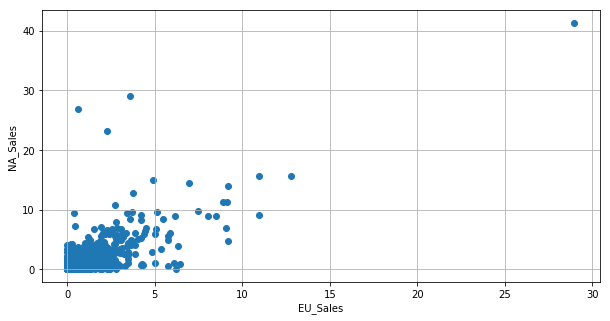

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(sales['EU_Sales'],sales['NA_Sales'])
plt.grid()
plt.xlabel('EU_Sales')
plt.ylabel('NA_Sales')
plt.show()


Correlación ventas en Europa con ventas en Japón:    

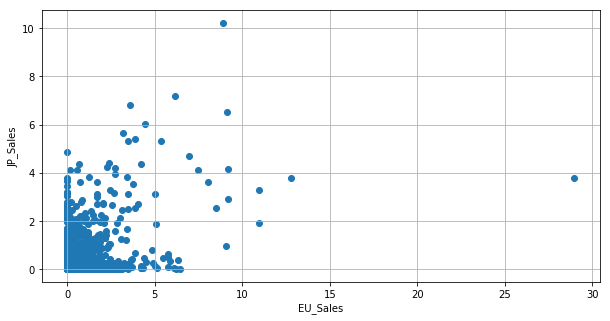

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(sales['EU_Sales'],sales['JP_Sales'])
plt.grid()
plt.xlabel('EU_Sales')
plt.ylabel('JP_Sales')
plt.show()


Correlación ventas globales y critic score:    

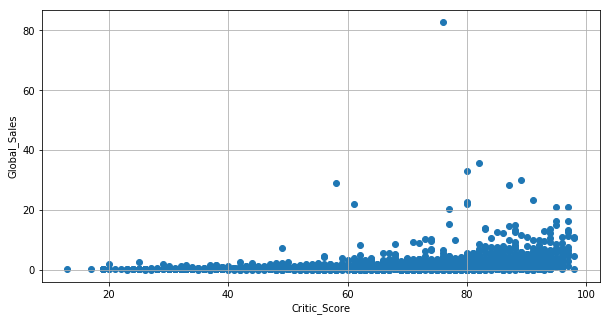

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(sales['Critic_Score'],sales['Global_Sales'])
plt.grid()
plt.xlabel('Critic_Score')
plt.ylabel('Global_Sales')
plt.show()


Una vez establecidas las correlaciones más fuertes entre las diferentes variables del dataframe, paso a convertirlo en pivot table para tratar de ahondar algo más en la información disponible. Realmente en este dataframe casi todos los juegos vendidos en el top 30 pertenecen a la misma empresa, Nintendo, por lo que intentar trabajar la información por el lado del fabricante no me va a aportar demasiado. Decido analizar qué tipo de videojuegos son los mas vendidos en función del género y del área geográfica e intentar entender por qué la correlación de las ventas en Japón sigue un patrón diferente

In [35]:
tabla=sales.pivot_table(index=['Genre'],values=['Global_Sales','NA_Sales','EU_Sales','JP_Sales'],aggfunc=({'Global_Sales':'sum','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum'}))
column_order=['Global_Sales','NA_Sales','EU_Sales','JP_Sales']
tabla = tabla.reindex(column_order, axis=1)
display((tabla).sort_values('Global_Sales',ascending=False))

,Global_Sales,NA_Sales,EU_Sales,JP_Sales
Genre,,,,
Action,1745.27,879.01,519.13,161.44
Sports,1332.00,684.43,376.79,135.54
Shooter,1052.94,592.24,317.34,38.76
Role-Playing,934.40,330.81,188.71,355.46
Platform,828.08,445.50,200.35,130.83
Misc,803.18,407.27,212.74,108.11
Racing,728.90,359.35,236.51,56.71
Fighting,447.48,223.36,100.33,87.48
Simulation,390.42,182.19,113.52,63.80


In [48]:
NA= sales.pivot_table(index=['Genre'],values=['NA_Sales'],aggfunc=({'NA_Sales':'sum'}))
display((NA).sort_values('NA_Sales',ascending=False).head(3))

,NA_Sales
Genre,
Action,879.01
Sports,684.43
Shooter,592.24


In [51]:
EU= sales.pivot_table(index=['Genre'],values=['EU_Sales'],aggfunc=({'EU_Sales':'sum'}))
display((NA).sort_values('EU_Sales',ascending=False).head(3))

,EU_Sales
Genre,
Action,519.13
Sports,376.79
Shooter,317.34


In [52]:
Jap= sales.pivot_table(index=['Genre'],values=['JP_Sales'],aggfunc=({'JP_Sales':'sum'}))
display((Jap).sort_values('JP_Sales',ascending=False).head(3))


,JP_Sales
Genre,
Role-Playing,355.46
Action,161.44
Sports,135.54


Analizando la información por separado vemos que en Japón los géneros que más se venden son diferentes a los de europa y NA. El número 1 en ventas son los videojuegos tipo role-Playing, mientras que en USA y EU los más vendidos son de acción y deportes. De ahí qie la correlación no sea tan fuerte, cómo vimos anteriormente